<a href="https://colab.research.google.com/github/revolt320/Titanic---Machine-Learning-from-Disaster/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TITANIC-MACHINE LEARNING FROM DISASTER

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

We build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


DATA DICTIONARY:

survival : Survival	(0 = No, 1 = Yes)

pclass : Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)

sex: Sex

Age :	Age in years

sibsp :	# of siblings / spouses aboard the Titanic

parch :	# of parents / children aboard the Titanic

ticket :	Ticket number

fare :	Passenger fare

cabin	: Cabin number

embarked	: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [493]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [494]:
df=pd.read_csv('train.csv',header=0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [496]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**DEALING WITH NULL VALUES**


*   Using fillna to fill null values in Age Column with mean values.
*   Using fillna to fill null values in Embarked Column.
*   Deleting Cabin Column as it contains only less and irrelevant values.



In [497]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df=df.drop(['Cabin'],axis=1)

In [498]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**DEALING WITH OUTLIERS**

Identifying outliers



In [499]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [500]:
fig = px.scatter(df,x='Fare', y='PassengerId',width=700, color='Pclass',title="Scatter Plot for Fares of Passengers of various Passenger Classes")
fig.show()

Removing Outliers

In [501]:
w=np.percentile(df.Fare,[99])[0]
df.Fare[df.Fare>w*2]=w

<ipython-input-501-c2c58481d6ef>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [502]:
fig = px.scatter(df,x='Fare', y='PassengerId',width=700, color='Pclass',title="Scatter Plot for Fares of Passengers of various Passenger Classes")
fig.show()

converting age into int datatype

In [503]:
df['Age'] = df['Age'].astype(int)
df['Survived'] = df['Survived'].astype(int)

In [504]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,31.317599
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,43.012250
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,263.000000


In [505]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


EXPLORATORY DATA ANALYSIS

In [506]:
px.histogram(df.query("Survived==1"), x='Survived', color="Sex", barmode='group',width=700)

In [507]:
px.histogram(df.query("Survived==1"), x='Survived', color="Pclass", barmode='group',width=700)

In [508]:
px.histogram(df.query("Survived==1"), x='Survived', color="Age", barmode='group',width=700)

In [509]:
px.histogram(df.query("Survived==1"), x='Survived', color="SibSp", barmode='group',width=700)

In [510]:
px.histogram(df.query("Survived==0"), x='Survived', color="SibSp", barmode='group',width=700)

In [511]:
px.histogram(df.query("Survived==1"), x='Survived', color="Parch", barmode='group',width=700)

In [512]:
px.histogram(df.query("Survived==1"), x='Survived', color="Embarked", barmode='group',width=700)

CONCLUSIONS FROM EDA


1.   More nummber of Females have survived.
2.   Most number of Survived passengers are from the 1st class followed by the 3rd class.
3.   Most number of people survived is of the age group 29.
4.   Most number of people survived are found not having siblings aboard, It is cited that there are no survivors having more than 4 siblings.
5.   Most number of people survived are found not having parents/Children aboard, It is cited that the number of survivors decrease when parent/Children value increases.
6.   Most number of people survived has embarked from Southampton.



Deleting unwanted columns for prediction

In [513]:
df=df.drop(['Name','Ticket'],axis=1)

Creating Dummies for Object Datatypes

In [514]:
cols=['Sex','Embarked']

In [515]:
df=pd.get_dummies(df,columns=cols,drop_first=True)

In [516]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22,1,0,7.2500,1,0,1
1,2,1,1,38,1,0,71.2833,0,0,0
2,3,1,3,26,0,0,7.9250,0,0,1
3,4,1,1,35,1,0,53.1000,0,0,1
4,5,0,3,35,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27,0,0,13.0000,1,0,1
887,888,1,1,19,0,0,30.0000,0,0,1
888,889,0,3,29,1,2,23.4500,0,0,1
889,890,1,1,26,0,0,30.0000,1,0,0


In [517]:
corr=df.corr()

<Axes: >

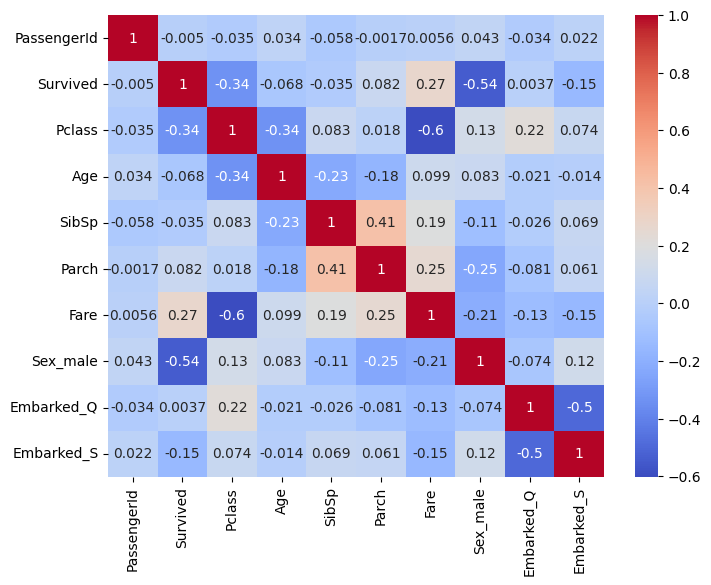

In [518]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,annot_kws={'size':10},cmap="coolwarm")

In [519]:
X=df.drop(columns=['Survived'],axis=1)
Y=df['Survived']

In [520]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [521]:
from sklearn import tree
Decision=tree.DecisionTreeClassifier(max_depth=6,min_samples_leaf=5)
Decision.fit(X_train,Y_train)
#min_samples_leaf,min_samples_split

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

In [522]:
y_test_pred=Decision.predict(X_test)

In [523]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_test_pred)

0.820627802690583